In [10]:
import pickle
import numpy as np
import pandas as pd
from numpy.linalg import norm
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
data = np.load('data.npy', allow_pickle=True)
# game_id , resnet , vit , label_name , guess time
# print(data[0][2])
labels = np.array(data[:, 3])
embeddings = np.array(data[:,1:3])
resnet = np.array(data[:,1])
vit = np.array(data[:,2])
# print(vit.shape)

(1, 512)


Plot of Distribution of Labels

1500


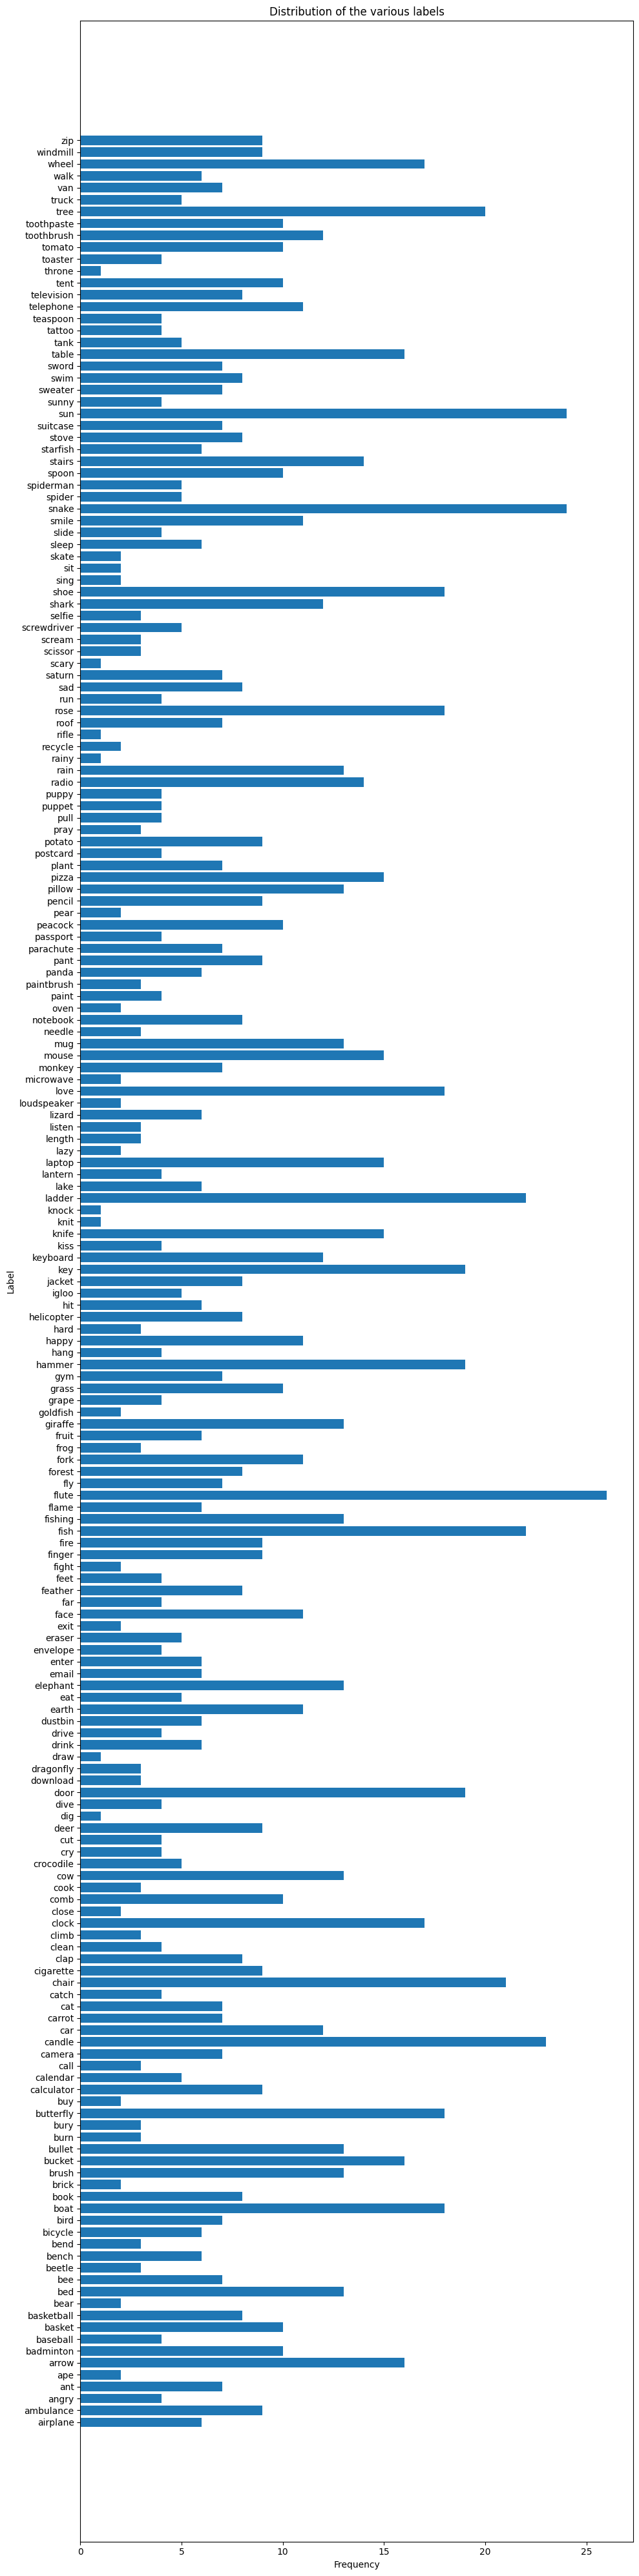

In [5]:
values, counts = np.unique(labels, return_counts=True)
plt.figure(figsize=(10, 40))
plt.xlabel('Frequency')
plt.ylabel('Label')
plt.title('Distribution of the various labels')
plt.barh(values, counts)
plt.tight_layout()
plt.show()


KNN Algorithm

In [2]:
class KNN:
    def __init__(self, k, encoder_type, metric):
        self.k = k
        self.encoder_type = encoder_type
        self.metric = metric
        self.measure = 'mode'
        

    def get_encoder(self):
        if self.encoder_type == 'vit':
            return 'vit'
        elif self.encoder_type == 'resnet':
            return 'resnet'

    def get_measure(self,A):
        if self.measure == 'mode':
            return np.mode(np.array(A))
            
    def get_distance(self, E1, E2):
        if self.metric == 'manhattan':
            return np.sum(np.abs(np.array(E1)-np.array(E2)))
        elif self.metric == 'euclidean':
            return np.sqrt(np.sum((np.square(np.array(E1)-np.array(E2)))))
        elif self.metric == 'cosine':
            return np.dot(np.array(E1),np.array(E2))/(norm(np.array(E1))*norm(np.array(E2)))
        
    def fit(self,train_embeddings,train_labels):
        self.train_embeddings = train_embeddings
        self.train_labels = train_labels
    
    def evaluate(self,embeddings,true_labels):
        predicted_labels = self.predict_array(embeddings)
        F1_score = f1_score(true_labels,predicted_labels,average='macro')
        accuracy = accuracy_score(true_labels,predicted_labels)
        precision = precision_score(true_labels,predicted_labels)
        recall = recall_score(true_labels,predicted_labels)
        return F1_score , accuracy , precision , recall
        
    def train(self):
        encoder = self.get_encoder()
        if(encoder=='vit'):
            num_total_samples = vit.shape[0]
            num_training_samples = int(num_total_samples*0.8)
            num_validation_samples = num_total_samples-num_training_samples
            # random shuffle
            indices = np.random.permutation(num_total_samples)
            train_index = indices[:num_training_samples]
            validate_index = indices[num_training_samples:]
            data_train = vit[train_index]
            data_validate = vit[validate_index]
            label_train = labels[train_index]
            label_validate = labels[validate_index]
            self.fit(data_train,label_train)
            
        elif(encoder=='resnet'):
            num_total_samples = resnet.shape[0]
            num_training_samples = int(num_total_samples*0.8)
            num_validation_samples = num_total_samples-num_training_samples
            # random shuffle
            indices = np.random.permutation(num_total_samples)
            train_index = indices[:num_training_samples]
            validate_index = indices[num_training_samples:]
            data_train = resnet[train_index]
            data_validate = resnet[validate_index]
            label_train = labels[train_index]
            label_validate = labels[validate_index]
            self.fit(data_train,label_train)

    def predict_sample(self,E1):
        distances = []
        for embeddings in self.train_embeddings:
            distances.append(self.get_distance(embeddings,E1))
        distances = np.array(distances)
        sorted_indices = np.argsort(distances)
        nearest_index = sorted_indices[:self.k]
        nearest_labels = []
        for indices in nearest_index:
            nearest_labels.append(self.train_labels[indices])
        unique_labels , counts = np.unique(nearest_labels,counts=True)
        classified_label = unique_labels[np.argmax(counts)]
        return classified_label
        
    def predict_array(self,X):
        predictions = []
        for embeddings in X:
            predictions.append(self.predict_sample(embeddings))
        return np.array(predictions)        
    
        



SyntaxError: invalid syntax (182032714.py, line 41)